In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from joblib import Parallel

from useful_func import *


from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from scipy.ndimage import binary_erosion


import tifffile as tiff
from tqdm import tqdm

sigma_480 = 198 #m2/mol
sigma_405 = 415 #m2/mol
tau_relax = 0.014

import click


import incense
from incense import ExperimentLoader

#source: incense github page

def get_mongo_uri():
    in_devcontainer = (
        os.environ.get("TERM_PROGRAM") == "vscode"
        or os.environ.get("HOME") == "/home/vscode"
        or (os.environ.get("PATH") or "").startswith("/home/vscode")
    )
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None



loader = ExperimentLoader(
    mongo_uri=get_mongo_uri(), 
    db_name='sacred'
)

#%matplotlib widget

In [2]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def set_figure(formatx = "%0.1e", formaty = "0.1e", figsize = (10,10)):
    inch = 2.35
    fig, ax = plt.subplots(figsize = (figsize[0]/inch, figsize[1]/inch))
    
    rc = {"font.family" : "Arial", 
          "mathtext.fontset" : "dejavusans",
          "axes.labelsize":15,
         "axes.labelsize":12}
    
    plt.rcParams.update(rc)

    
    formatx = FormatStrFormatter(formatx)
    formaty = FormatStrFormatter(formaty)

    ax.xaxis.set_major_formatter(formatx)
    ax.yaxis.set_major_formatter(formaty)
    
    return fig, ax



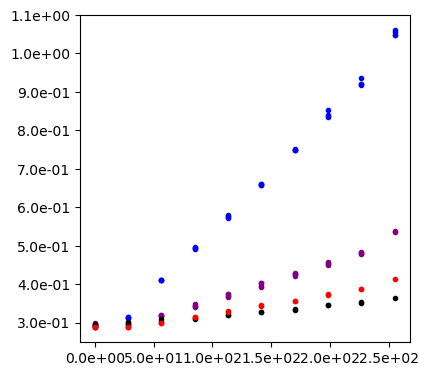

In [3]:
fig, ax = set_figure("%0.1e", "%0.1e")
clean = np.arange(302, 342) #blue
for idi in clean:
    exp = loader.find_by_id(int(idi))
    x = exp.config.arduino_LED.blue_param.analog_value.value
    y = exp.metrics['Fluorescence'].values[0]

    ax.plot(x, y, '.b')
    
clean = np.arange(343, 381) #purple
    
for idi in clean:
    exp = loader.find_by_id(int(idi))
    x = exp.config.arduino_LED.purple_param.analog_value.value
    y = exp.metrics['Fluorescence'].values[0]

    ax.plot(x, y, '.', color= "purple")
#plt.ylabel(r'Intensity ($\mu$E $\dot$')#m$^2$\dot ')#s$^{-1^}$)')

clean = np.arange(382, 401) #blue/glass
for idi in clean:
    exp = loader.find_by_id(int(idi))
    x = exp.config.arduino_LED.blue_param.analog_value.value
    y = exp.metrics['Fluorescence'].values[0]

    ax.plot(x, y, '.k')
    
clean = np.arange(402, 421) #purple/glass
for idi in clean:
    exp = loader.find_by_id(int(idi))
    x = exp.config.arduino_LED.purple_param.analog_value.value
    y = exp.metrics['Fluorescence'].values[0]

    ax.plot(x, y, '.r')

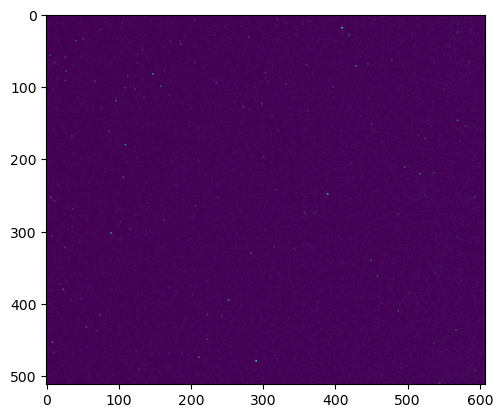

In [8]:
 #PURPLE!!


for i in [304]:
    exp = loader.find_by_id(i)

    image = tiff.imread(exp.artifacts["image.tiff"].file)
    plt.figure()
    plt.imshow(image[:,:,1])

In [ ]:
 #PURPLE!!


for i in [423, 424, 425, 426]:
    exp = loader.find_by_id(i)

    image = tiff.imread(exp.artifacts["image.tiff"].file)
    plt.figure()
    plt.imshow(image[:,:,1])

In [5]:
image.shape

(512, 608, 4)

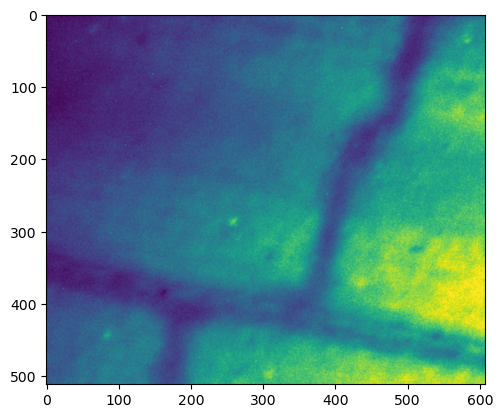

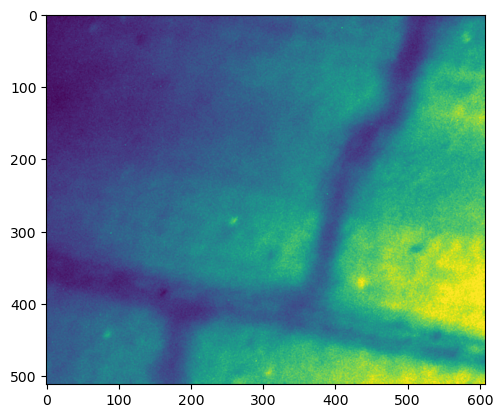

In [4]:
for i in [434, 435]:
    exp = loader.find_by_id(i)

    image = tiff.imread(exp.artifacts["image.tiff"].file)
    plt.figure()
    plt.imshow(image[:,:,1])